In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget https://github.com/daryabalba/HSE_HACK/raw/refs/heads/main/train.xlsx

--2024-09-22 07:56:36--  https://github.com/daryabalba/HSE_HACK/raw/refs/heads/main/train.xlsx
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daryabalba/HSE_HACK/refs/heads/main/train.xlsx [following]
--2024-09-22 07:56:37--  https://raw.githubusercontent.com/daryabalba/HSE_HACK/refs/heads/main/train.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2703472 (2.6M) [application/octet-stream]
Saving to: ‘train.xlsx’

train.xlsx          100%[===================>]   2.58M  --.-KB/s    in 0.03s   

2024-09-22 07:56:37 (88.1 MB/s) - ‘train.xlsx’ saved [2703472/2703472]



In [ ]:
!wget https://github.com/daryabalba/HSE_HACK/raw/refs/heads/main/test.xlsx

--2024-09-22 07:56:46--  https://github.com/daryabalba/HSE_HACK/raw/refs/heads/main/test.xlsx
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daryabalba/HSE_HACK/refs/heads/main/test.xlsx [following]
--2024-09-22 07:56:46--  https://raw.githubusercontent.com/daryabalba/HSE_HACK/refs/heads/main/test.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029410 (1005K) [application/octet-stream]
Saving to: ‘test.xlsx’

test.xlsx           100%[===================>]   1005K  --.-KB/s    in 0.02s   

2024-09-22 07:56:46 (45.3 MB/s) - ‘test.xlsx’ saved [1029410/1029410]



In [ ]:
train_df_classif_raw = pd.read_excel('train.xlsx')
test_df_classif_raw = pd.read_excel('test.xlsx')

#### transforming Способ оплаты variable

In [ ]:
for row in train_df_classif_raw.iterrows():

    idx = row[0]
    row = row[1]

    if (
        row['Способ оплаты'] == 'Внешняя система оплаты' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (С предоплатой)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Оплата наличными)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Банковская карта)'
        ):
        train_df_classif_raw['Способ оплаты'][idx] = 'Внешняя система оплаты'

    if (
    row['Способ оплаты'] == 'Банк. карта: Банк Россия (банк. карта)' or \
    row['Способ оплаты'] == 'Гарантия банковской картой' or \
    row['Способ оплаты'] == 'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта: Эквайринг ComfortBooking (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)' or \
    row['Способ оплаты'] == 'Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Банковская карта)'
    ):
        train_df_classif_raw['Способ оплаты'][idx] = 'Банковская карта'

    if (
    row['Способ оплаты'] == 'Отложенная электронная оплата: Банк Россия (банк. карта)' or \
    row['Способ оплаты'] == 'При заселении'
        ):
        train_df_classif_raw['Способ оплаты'][idx] = 'Отложенная оплата'

    if (
    row['Способ оплаты'] == 'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)'
        ):
        train_df_classif_raw['Способ оплаты'][idx] = 'Система быстрых платежей'

In [ ]:
train_df_classif_raw

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная оплата,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банковская карта,2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты,2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,26169,20230310-7492-177993190,1,18240.0,9120,Банковская карта,2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,26170,20230625-16563-206126520,1,69600.0,23200,Банковская карта,2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,26171,20220624-7492-137587082,1,55600.0,13900,Банковская карта,2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,26172,20220427-7491-125459150,1,6300.0,0,Банковская карта,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [ ]:
for row in test_df_classif_raw.iterrows():

    idx = row[0]
    row = row[1]

    if (
        row['Способ оплаты'] == 'Внешняя система оплаты' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (С предоплатой)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Оплата наличными)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Банковская карта)'
        ):
        test_df_classif_raw['Способ оплаты'][idx] = 'Внешняя система оплаты'

    if (
    row['Способ оплаты'] == 'Банк. карта: Банк Россия (банк. карта)' or \
    row['Способ оплаты'] == 'Гарантия банковской картой' or \
    row['Способ оплаты'] == 'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта: Эквайринг ComfortBooking (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)' or \
    row['Способ оплаты'] == 'Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)' or \
    row['Способ оплаты'] == 'Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)' or \
    row['Способ оплаты'] == 'Внешняя система оплаты (Банковская карта)'
    ):
        test_df_classif_raw['Способ оплаты'][idx] = 'Банковская карта'

    if (
    row['Способ оплаты'] == 'Отложенная электронная оплата: Банк Россия (банк. карта)' or \
    row['Способ оплаты'] == 'При заселении'
        ):
        test_df_classif_raw['Способ оплаты'][idx] = 'Отложенная оплата'

    if (
    row['Способ оплаты'] == 'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)'
        ):
        test_df_classif_raw['Способ оплаты'][idx] = 'Система быстрых платежей'

In [ ]:
test_df_classif_raw

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,0,20231129-16563-238946689,1,23750.0,23750,Банковская карта,2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,Номер «Студия»,3,4
1,1,20221219-7491-174959103,1,15010.0,7505,Банковская карта,2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,Номер «Стандарт»,2,3
2,2,20221211-6634-172724329,1,8400.0,8400,Отложенная оплата,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
3,3,20230821-6634-212247350,1,42500.0,42500,Банковская карта,2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1
4,4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,Номер «Стандарт»,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,11213,20220507-7492-130458541,1,50200.0,50200,Банковская карта,2022-03-27 21:30:38,2022-05-07 15:00:00,2,2022-05-09 12:00:00,Официальный сайт,Номер «Студия»,4,2
11214,11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей,2023-11-11 17:51:55,2024-02-16 15:00:00,5,2024-02-21 12:00:00,Официальный сайт,Коттедж с 2 спальнями,4,1
11215,11215,20220209-6634-124107676,1,42300.0,42300,Банковская карта,2022-02-09 02:23:14,2022-02-09 15:00:00,1,2022-02-10 12:00:00,Официальный сайт,Коттедж с 3 спальнями,5,1
11216,11216,20230128-6634-179977236,1,27900.0,27900,Банковская карта,2023-01-21 09:10:17,2023-01-28 15:00:00,1,2023-01-29 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1


In [ ]:
train_df_classif_raw['Способ оплаты'].unique()

array(['Внешняя система оплаты', 'Отложенная оплата', 'Банковская карта',
       'Система быстрых платежей'], dtype=object)

In [ ]:
test_df_classif_raw.to_excel('test_payment_coded.xlsx')
train_df_classif_raw.to_excel('train_payment_coded.xlsx')

In [ ]:
train_df_classif = pd.read_csv('df_train_encoded.csv', sep=';')
test_df_classif = pd.read_csv('df_test_encoded.csv', sep=';')

In [ ]:
train_df_classif

,Номеров,Стоимость,Внесена предоплата,Ночей,Гостей,Отменено,booking_day,days_before_checkin,Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay),Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay),...,booking_precip,checkin_avg_temp,checkin_precip,checkin_weekday_0,checkin_weekday_1,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6
0,1,25700.0,0,3,2,1,20,7,0.0,0.0,...,0.0,10.10,12.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,24800.0,12400,2,2,0,18,23,0.0,0.0,...,0.4,23.20,9.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25800.0,12900,2,2,0,14,19,0.0,0.0,...,0.0,11.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,10500.0,0,1,1,0,8,9,0.0,0.0,...,0.0,19.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,28690.0,28690,2,4,0,20,8,0.0,0.0,...,1.6,16.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,2,2,0,7,61,0.0,0.0,...,0.0,-6.65,2.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26170,1,69600.0,23200,3,3,0,20,4,0.0,0.0,...,3.2,23.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26171,1,55600.0,13900,4,2,0,8,46,0.0,0.0,...,9.8,21.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26172,1,6300.0,0,1,2,1,19,67,0.0,0.0,...,12.2,15.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### some analysis

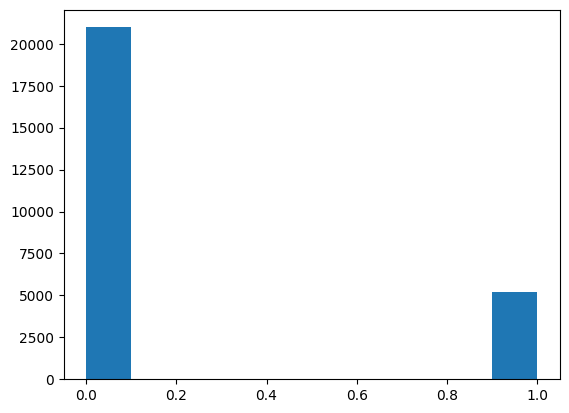

In [ ]:
import matplotlib.pyplot as plt

plt.hist(canc_labels)
plt.show()

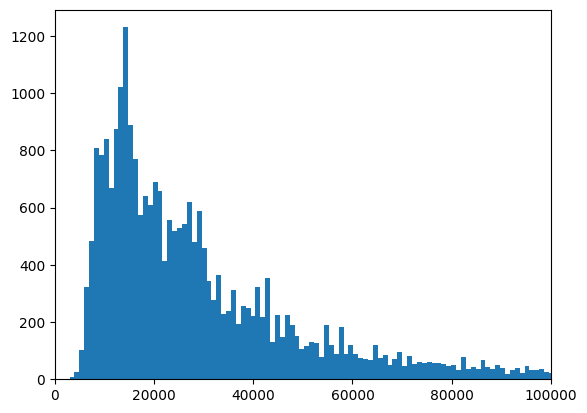

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_df_classif['Стоимость'], bins=1000)
plt.xlim([0, 100000])
plt.show()

In [ ]:
numeric_df = train_df_classif[['Внесена предоплата', 'Номеров', 'Стоимость', 'Ночей', 'Гостей']]
numeric_df

,Внесена предоплата,Номеров,Стоимость,Ночей,Гостей
0,0,1,25700.0,3,2
1,12400,1,24800.0,2,2
2,12900,1,25800.0,2,2
3,0,1,10500.0,1,1
4,28690,1,28690.0,2,4
...,...,...,...,...,...
26169,9120,1,18240.0,2,2
26170,23200,1,69600.0,3,3
26171,13900,1,55600.0,4,2
26172,0,1,6300.0,1,2


In [ ]:
train_df_classif[['Внесена предоплата', 'Номеров', 'Стоимость', 'Ночей', 'Гостей']].corr()

,Внесена предоплата,Номеров,Стоимость,Ночей,Гостей
Внесена предоплата,1.000000,0.120081,0.638191,0.278583,0.313720
Номеров,0.120081,1.000000,0.207748,0.012206,0.516463
Стоимость,0.638191,0.207748,1.000000,0.664773,0.380856
Ночей,0.278583,0.012206,0.664773,1.000000,0.049104
Гостей,0.313720,0.516463,0.380856,0.049104,1.000000


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)  # 0 is default

print(selector.fit_transform(numeric_df))

[[0.00e+00 2.57e+04 3.00e+00 2.00e+00 1.00e+00]
 [1.24e+04 2.48e+04 2.00e+00 2.00e+00 1.00e+00]
 [1.29e+04 2.58e+04 2.00e+00 2.00e+00 4.00e+00]
 ...
 [1.39e+04 5.56e+04 4.00e+00 2.00e+00 2.00e+00]
 [0.00e+00 6.30e+03 1.00e+00 2.00e+00 3.00e+00]
 [2.46e+04 2.46e+04 1.00e+00 3.00e+00 1.00e+00]]


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mut_info = mutual_info_classif(train_df_classif.drop([
    'Отменено', 'Статус брони_Активный', 'Статус брони_Отмена', 'Статус брони_Неподтвержденные'
    ], axis=1), train_df_classif['Отменено'], random_state=68)
print(mut_info)

[2.43233085e-03 7.62679443e-03 1.14622282e-01 5.06736265e-04
 2.03140537e-03 0.00000000e+00 1.98245555e-02 2.98919357e-03
 1.44966532e-03 1.55264166e-03 2.14269408e-03 4.17973968e-02
 3.49642399e-03 1.05442696e-02 2.78958043e-03 1.11539366e-03
 0.00000000e+00 0.00000000e+00 6.59441578e-02 1.61377234e-04
 1.86299192e-03 9.68165122e-05 0.00000000e+00 0.00000000e+00
 4.53744984e-03 1.29971745e-03 0.00000000e+00 4.18115668e-04
 1.05629647e-03 1.58532451e-03 1.49772344e-03 0.00000000e+00
 1.78772523e-03 0.00000000e+00 2.03128942e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.94988257e-03 2.92227085e-03
 5.13145332e-04 1.35939914e-03 1.18192301e-02 1.20545832e-03
 1.85862788e-02 0.00000000e+00 0.00000000e+00 3.81406341e-03
 2.74920408e-03 0.00000000e+00 8.34521161e-04 0.00000000e+00
 1.80289788e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.53768808e-03 1.36893323e-03 9.74059720e-04 0.00000000e+00
 0.00000000e+00 4.54699927e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.776008

In [ ]:
mutual_info = pd.Series(mut_info)
mutual_info.index = train_df_classif.drop([
    'Отменено', 'Статус брони_Активный', 'Статус брони_Отмена', 'Статус брони_Неподтвержденные'
    ], axis=1).columns
mutual_info.sort_values(ascending=False)[:30]

,0
Внесена предоплата,0.114622
Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта),0.065944
Способ оплаты_Банк. карта: Банк Россия (банк. карта),0.041797
days_before_checkin,0.019825
Источник_Официальный сайт,0.018586
Источник_Бронирование из экстранета,0.011819
Способ оплаты_Внешняя система оплаты,0.010544
Стоимость,0.007627
Гостиница_3,0.005074
Гостиница_2,0.004710


In [ ]:
train_df_classif = pd.read_csv('df_train_encoded.csv').drop(
    ['Номеров', 'Стоимость', 'Внесена предоплата', 'Ночей', 'Гостей'], axis=1
    )
test_df_classif = pd.read_csv('df_test_encoded.csv')

In [ ]:
test_df_classif.columns

Index(['Номеров', 'Стоимость', 'Внесена предоплата', 'Ночей', 'Гостей',
       'booking_day', 'booking_weekday', 'booking_month',
       'days_before_checkin',
       'Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)',
       'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)',
       'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
       'Способ оплаты_Банк. карта: Банк Россия (банк. карта)',
       'Способ оплаты_Банк. карта: Эквайринг ComfortBooking (Банк. карта)',
       'Способ оплаты_Внешняя система оплаты',
       'Способ оплаты_Внешняя система оплаты (Банковская карта)',
       'Способ оплаты_Внешняя система оплаты (Оплата наличными)',
       'Способ оплаты_Внешняя система оплаты (С предоплатой)',
       'Способ оплаты_Гарантия банковской картой',
       'Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта)',
       'Способ оплаты_При заселении',
       

### coding some categorical variables

In [ ]:
train_df_classif = pd.read_csv('df_train_encoded.csv', sep=';')
test_df_classif = pd.read_csv('df_test_encoded.csv', sep=';')

In [ ]:
train_df_classif

,Номеров,Стоимость,Внесена предоплата,Ночей,Гостей,Отменено,booking_day,days_before_checkin,Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay),Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay),...,booking_precip,checkin_avg_temp,checkin_precip,checkin_weekday_0,checkin_weekday_1,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6
0,1,25700.0,0,3,2,1,20,7,0.0,0.0,...,0.0,10.10,12.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,24800.0,12400,2,2,0,18,23,0.0,0.0,...,0.4,23.20,9.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25800.0,12900,2,2,0,14,19,0.0,0.0,...,0.0,11.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,10500.0,0,1,1,0,8,9,0.0,0.0,...,0.0,19.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,28690.0,28690,2,4,0,20,8,0.0,0.0,...,1.6,16.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,2,2,0,7,61,0.0,0.0,...,0.0,-6.65,2.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26170,1,69600.0,23200,3,3,0,20,4,0.0,0.0,...,3.2,23.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26171,1,55600.0,13900,4,2,0,8,46,0.0,0.0,...,9.8,21.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26172,1,6300.0,0,1,2,1,19,67,0.0,0.0,...,12.2,15.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
new_payment_features = {
    'Внешняя система оплаты': [],
    'Банковская карта': [],
    'Отложенная оплата': [], # Отложенная электронная оплата и при заселении
    'Система быстрых платежей': []
}

for row in train_df_classif.iterrows():
    row = row[1]

    if (
        row['Способ оплаты_Внешняя система оплаты'] == 1 or \
    row['Способ оплаты_Внешняя система оплаты (С предоплатой)'] == 1 or \
    row['Способ оплаты_Внешняя система оплаты (Оплата наличными)'] == 1 or \
    row['Способ оплаты_Внешняя система оплаты (Банковская карта)'] == 1
        ):
        new_payment_features['Внешняя система оплаты'].append(1)
        new_payment_features['Банковская карта'].append(0)
        new_payment_features['Отложенная оплата'].append(0)
        new_payment_features['Система быстрых платежей'].append(0)

    if (
    row['Способ оплаты_Банк. карта: Банк Россия (банк. карта)'] == 1 or \
    row['Способ оплаты_Гарантия банковской картой'] == 1 or \
    row['Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)'] == 1 or \
    row['Способ оплаты_Банк. карта: Эквайринг ComfortBooking (Банк. карта)'] == 1 or \
    row['Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)'] == 1 or \
    row['Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)'] == 1 or \
    row['Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)'] == 1 or \
    row['Способ оплаты_Внешняя система оплаты (Банковская карта)'] == 1
    ):
        new_payment_features['Внешняя система оплаты'].append(0)
        new_payment_features['Банковская карта'].append(1)
        new_payment_features['Отложенная оплата'].append(0)
        new_payment_features['Система быстрых платежей'].append(0)

    if (
    row['Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта)'] == 1 or \
    row['Способ оплаты_При заселении']
        ):
        new_payment_features['Внешняя система оплаты'].append(0)
        new_payment_features['Банковская карта'].append(0)
        new_payment_features['Отложенная оплата'].append(1)
        new_payment_features['Система быстрых платежей'].append(0)

    if (
    row['Способ оплаты_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)'] == 1
        ):
        new_payment_features['Внешняя система оплаты'].append(0)
        new_payment_features['Банковская карта'].append(0)
        new_payment_features['Отложенная оплата'].append(0)
        new_payment_features['Система быстрых платежей'].append(1)

new_payment_features_df = pd.DataFrame(new_payment_features)
train_df_classif = pd.concat([train_df_classif, new_payment_features_df], ignore_index=True, axis=1)
train_df_classif = train_df_classif.drop([['Способ оплаты_Внешняя система оплаты',
 'Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта)',
 'Способ оплаты_Банк. карта: Банк Россия (банк. карта)',
 'Способ оплаты_Внешняя система оплаты (С предоплатой)',
 'Способ оплаты_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
 'Способ оплаты_Гарантия банковской картой', 'Способ оплаты_Внешняя система оплаты (Оплата наличными)',
 'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
 'Способ оплаты_При заселении', 'Способ оплаты_Банк. карта: Эквайринг ComfortBooking (Банк. карта)',
 'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)',
 'Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)',
 'Способ оплаты_Внешняя система оплаты (Банковская карта)',
 'Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)']], axis=1)

KeyError: "[('Способ оплаты_Внешняя система оплаты', 'Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта)', 'Способ оплаты_Банк. карта: Банк Россия (банк. карта)', 'Способ оплаты_Внешняя система оплаты (С предоплатой)', 'Способ оплаты_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)', 'Способ оплаты_Гарантия банковской картой', 'Способ оплаты_Внешняя система оплаты (Оплата наличными)', 'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)', 'Способ оплаты_При заселении', 'Способ оплаты_Банк. карта: Эквайринг ComfortBooking (Банк. карта)', 'Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)', 'Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)', 'Способ оплаты_Внешняя система оплаты (Банковская карта)', 'Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)')] not found in axis"

In [ ]:
new_payment_features_df

,Внешняя система оплаты,Банковская карта,Отложенная оплата,Система быстрых платежей
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
26223,0,1,0,0
26224,0,1,0,0
26225,0,1,0,0
26226,0,1,0,0


In [ ]:
train_df_classif

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,1.0,25700.0,0.0,3.0,2.0,1.0,20.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
1,1.0,24800.0,12400.0,2.0,2.0,0.0,18.0,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,1.0,25800.0,12900.0,2.0,2.0,0.0,14.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
3,1.0,10500.0,0.0,1.0,1.0,0.0,8.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1.0,28690.0,28690.0,2.0,4.0,0.0,20.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
26224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
26225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
26226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


In [ ]:
pd.DataFrame({'a': [1, 2, 3]})

,a
0,1
1,2
2,3


In [ ]:
pd.DataFrame({'a': [1, 2, 3]}) + pd.DataFrame({'b': [4, 5, 6]})

,a,b
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [ ]:
pd.concat([pd.DataFrame({'a': [1, 2, 3]}), pd.DataFrame({'b': [4, 5, 6]})], ignore_index=True, axis=1)

,0,1
0,1,4
1,2,5
2,3,6


### models first try

In [ ]:
train_df_classif = pd.read_csv('df_train_encoded.csv', sep=',')
test_df_classif = pd.read_csv('df_test_encoded.csv', sep=',')

In [ ]:
train_df_classif

,Номеров,Стоимость,Внесена предоплата,Ночей,Гостей,booking_day,days_before_checkin,holiday_during_stay,booking_avg_temp,booking_precip,...,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6,Сезон_Весна,Сезон_Зима,Сезон_Лето,Сезон_Осень,Отменено
0,1,25700.0,0,3,2,20,7,1,10.75,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1,24800.0,12400,2,2,18,23,0,18.55,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1,25800.0,12900,2,2,14,19,1,9.95,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,1,10500.0,0,1,1,8,9,0,22.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1,28690.0,28690,2,4,20,8,0,13.25,1.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,2,2,7,61,1,-22.30,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
26170,1,69600.0,23200,3,3,20,4,1,21.65,3.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
26171,1,55600.0,13900,4,2,8,46,1,10.10,9.8,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
26172,1,6300.0,0,1,2,19,67,0,7.10,12.2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
import matplotlib.pyplot as plt

plt.bar()

In [ ]:
list(train_df_classif.columns)

['Номеров',
 'Стоимость',
 'Внесена предоплата',
 'Ночей',
 'Гостей',
 'booking_day',
 'days_before_checkin',
 'holiday_during_stay',
 'booking_avg_temp',
 'booking_precip',
 'checkin_avg_temp',
 'checkin_precip',
 'Способ оплаты_Банк. карта',
 'Способ оплаты_Внешняя система оплаты',
 'Способ оплаты_Гарантия банковской картой',
 'Способ оплаты_Отложенная оплата',
 'Способ оплаты_Система быстрых платежей',
 'Источник_101hotels.com',
 'Источник_Acase.ru',
 'Источник_Alean.ru',
 'Источник_Bronevik.com',
 'Источник_Cuva',
 'Источник_OneTwoTrip',
 'Источник_Otello',
 'Источник_Ozon',
 'Источник_Svoy Hotel',
 'Источник_Zabroniryi.ru',
 'Источник_booking.com',
 'Источник_expedia.com',
 'Источник_ostrovok.ru',
 'Источник_Бронирование из экстранета',
 'Источник_ВКонтакте',
 'Источник_Официальный сайт',
 'Источник_Программа лояльности',
 'Источник_Тинькофф Путешествия',
 'Источник_Яндекс.Путешествия',
 'Категория номера_Апартаменты',
 'Категория номера_Апартаменты, Стандарт',
 'Категория номера_

In [ ]:
canc_labels = train_df_classif['Отменено']
train_df_classif = train_df_classif.drop('Отменено', axis=1)

In [ ]:
train_df_classif

,Номеров,Стоимость,Внесена предоплата,Ночей,Гостей,booking_day,days_before_checkin,Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay),Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay),Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта),...,booking_precip,checkin_avg_temp,checkin_precip,checkin_weekday_0,checkin_weekday_1,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6
0,1,25700.0,0,3,2,20,7,0.0,0.0,0.0,...,0.0,10.10,12.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,24800.0,12400,2,2,18,23,0.0,0.0,0.0,...,0.4,23.20,9.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25800.0,12900,2,2,14,19,0.0,0.0,0.0,...,0.0,11.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,10500.0,0,1,1,8,9,0.0,0.0,0.0,...,0.0,19.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,28690.0,28690,2,4,20,8,0.0,0.0,0.0,...,1.6,16.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,2,2,7,61,0.0,0.0,0.0,...,0.0,-6.65,2.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26170,1,69600.0,23200,3,3,20,4,0.0,0.0,0.0,...,3.2,23.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26171,1,55600.0,13900,4,2,8,46,0.0,0.0,0.0,...,9.8,21.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26172,1,6300.0,0,1,2,19,67,0.0,0.0,0.0,...,12.2,15.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# считаем цену за номер
prices_train = []
for idx, price in enumerate(train_df_classif['Стоимость']):
    prices_train.append(price / train_df_classif['Ночей'][idx])

train_df_classif = train_df_classif.drop('Стоимость', axis=1)
train_df_classif['Цена'] = prices_train

prices_test = []
for idx, price in enumerate(test_df_classif['Стоимость']):
    prices_test.append(price / test_df_classif['Ночей'][idx])

test_df_classif = test_df_classif.drop('Стоимость', axis=1)
test_df_classif['Цена'] = prices_test

In [ ]:
# считаем цену номера на человека
avg_prices_train = []
for idx, price in enumerate(train_df_classif['Цена']):
    avg_prices_train.append(price / train_df_classif['Гостей'][idx])

train_df_classif = train_df_classif.drop('Цена', axis=1)
train_df_classif['Цена на человека'] = avg_prices_train

avg_prices_test = []
for idx, price in enumerate(test_df_classif['Цена']):
    avg_prices_test.append(price / test_df_classif['Гостей'][idx])

test_df_classif = test_df_classif.drop('Цена', axis=1)
test_df_classif['Цена на человека'] = avg_prices_test

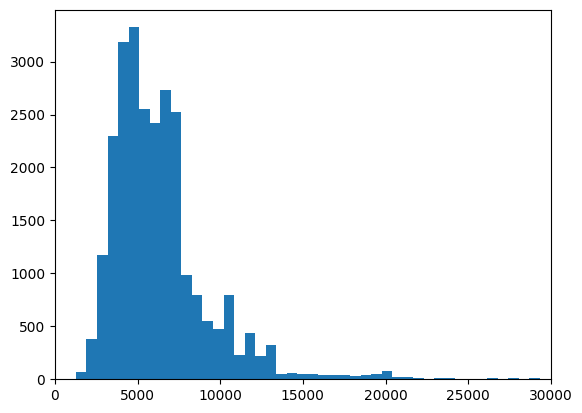

In [ ]:
plt.hist(train_df_classif['Цена на человека'], bins=100)
plt.xlim([0, 30000])
plt.show()

In [ ]:
train_df_classif

,Номеров,Внесена предоплата,Ночей,Гостей,booking_day,days_before_checkin,holiday_during_stay,booking_avg_temp,booking_precip,checkin_avg_temp,...,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6,Сезон_Весна,Сезон_Зима,Сезон_Лето,Сезон_Осень,Цена на человека
0,1,0,3,2,20,7,1,10.75,0.0,10.10,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4283.333333
1,1,12400,2,2,18,23,0,18.55,0.4,23.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6200.000000
2,1,12900,2,2,14,19,1,9.95,0.0,11.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6450.000000
3,1,0,1,1,8,9,0,22.75,0.0,19.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10500.000000
4,1,28690,2,4,20,8,0,13.25,1.6,16.05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3586.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,9120,2,2,7,61,1,-22.30,0.0,-6.65,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4560.000000
26170,1,23200,3,3,20,4,1,21.65,3.2,23.65,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7733.333333
26171,1,13900,4,2,8,46,1,10.10,9.8,21.85,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6950.000000
26172,1,0,1,2,19,67,0,7.10,12.2,15.45,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3150.000000


In [ ]:
train_df_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Номеров                                   26174 non-null  int64  
 1   Внесена предоплата                        26174 non-null  int64  
 2   Ночей                                     26174 non-null  int64  
 3   Гостей                                    26174 non-null  int64  
 4   booking_day                               26174 non-null  int64  
 5   days_before_checkin                       26174 non-null  int64  
 6   holiday_during_stay                       26174 non-null  int64  
 7   booking_avg_temp                          26164 non-null  float64
 8   booking_precip                            26164 non-null  float64
 9   checkin_avg_temp                          26167 non-null  float64
 10  checkin_precip                    

#### for ready-to-go data

In [ ]:
df_train_final = pd.read_csv('df_train_final.csv')
df_val_final = pd.read_csv('df_val_final.csv')
df_test_final = pd.read_csv('df_test_final.csv')

In [ ]:
df_train_final = df_train_final.drop(['Источник', 'Способ оплаты', 'Категория номера', 'Сезон'], axis=1)
df_val_final = df_val_final.drop(['Источник', 'Способ оплаты', 'Категория номера', 'Сезон'], axis=1)
df_test_final = df_test_final.drop(['Источник', 'Способ оплаты', 'Категория номера', 'Сезон'], axis=1)

KeyError: "['Источник', 'Способ оплаты', 'Категория номера', 'Сезон'] not found in axis"

In [ ]:
df_train_final = df_train_final.drop(['checkin_weekday', 'booking_month', 'booking_weekday', 'Гостиница'], axis=1)
df_val_final = df_val_final.drop(['checkin_weekday', 'booking_month', 'booking_weekday', 'Гостиница'], axis=1)
# df_test_final = df_test_final.drop(['checkin_weekday', 'booking_month', 'booking_weekday', 'Гостиница'], axis=1)

In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 79 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Номеров                                   18321 non-null  int64  
 1   Внесена предоплата                        18321 non-null  int64  
 2   Ночей                                     18321 non-null  int64  
 3   Гостей                                    18321 non-null  int64  
 4   Отменено                                  18321 non-null  int64  
 5   booking_day                               18321 non-null  int64  
 6   days_before_checkin                       18321 non-null  int64  
 7   holiday_during_stay                       18321 non-null  int64  
 8   booking_avg_temp                          18321 non-null  float64
 9   booking_precip                            18321 non-null  float64
 10  checkin_avg_temp                  

In [ ]:
train_canc_labels = df_train_final['Отменено']
df_train_final = df_train_final.drop('Отменено', axis=1)

val_canc_labels = df_val_final['Отменено']
df_val_final = df_val_final.drop('Отменено', axis=1)

#### MI feature influence calculation

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mut_info = mutual_info_classif(df_train_final, train_canc_labels, random_state=68)

In [ ]:
mutual_info = pd.Series(mut_info)
mutual_info.index = df_train_final.columns
mutual_info_df = mutual_info.sort_values(ascending=False)
mutual_info_df_positive = mutual_info_df[mutual_info_df > 0]
mutual_info_df_positive

,0
Внесена предоплата,0.117385
Способ оплаты_Отложенная оплата,0.057586
Способ оплаты_Банк. карта,0.050816
days_before_checkin,0.023814
Цена на человека,0.010849
Источник_Официальный сайт,0.009279
checkin_avg_temp,0.008405
holiday_during_stay,0.008174
Сезон_Осень,0.006784
booking_avg_temp,0.006576


In [ ]:
df_train_final = df_train_final[mutual_info_df_positive.index]
df_train_final

,Внесена предоплата,Способ оплаты_Отложенная оплата,Способ оплаты_Банк. карта,days_before_checkin,Цена на человека,Источник_Официальный сайт,checkin_avg_temp,holiday_during_stay,Сезон_Осень,booking_avg_temp,...,checkin_weekday_4,Категория номера_Студия,booking_month_6,Гостиница_1,booking_day,Источник_Ozon,booking_month_12,Способ оплаты_Внешняя система оплаты,"Категория номера_Апартаменты, Стандарт",Источник_ВКонтакте
0,7040,0.0,1.0,3,2346.666667,1.0,13.00,1,0.0,11.05,...,0.0,0.0,0.0,1.0,19,0.0,0.0,0.0,0.0,0.0
1,18100,1.0,0.0,26,4525.000000,1.0,21.65,1,0.0,14.20,...,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0
2,37900,0.0,1.0,34,6316.666667,1.0,0.05,0,1.0,-1.85,...,0.0,0.0,0.0,1.0,16,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,35,3750.000000,0.0,12.80,0,1.0,24.30,...,0.0,0.0,0.0,0.0,18,0.0,0.0,1.0,0.0,0.0
4,21300,1.0,0.0,29,10100.000000,0.0,18.50,0,0.0,26.10,...,0.0,1.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,10400,0.0,1.0,28,5200.000000,1.0,10.15,0,0.0,-1.65,...,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0
18317,0,1.0,0.0,0,6650.000000,1.0,14.80,0,0.0,15.20,...,1.0,0.0,0.0,0.0,28,0.0,0.0,0.0,0.0,0.0
18318,24600,0.0,1.0,9,6150.000000,1.0,23.20,1,0.0,16.50,...,0.0,0.0,1.0,1.0,15,0.0,0.0,0.0,0.0,0.0
18319,14800,0.0,1.0,12,7400.000000,1.0,22.50,0,0.0,24.75,...,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test_final = df_test_final[mutual_info_df_positive.index]
df_test_final

,Внесена предоплата,Способ оплаты_Отложенная оплата,Способ оплаты_Банк. карта,days_before_checkin,Цена на человека,Источник_Официальный сайт,checkin_avg_temp,holiday_during_stay,Сезон_Осень,booking_avg_temp,...,checkin_weekday_4,Категория номера_Студия,booking_month_6,Гостиница_1,booking_day,Источник_Ozon,booking_month_12,Способ оплаты_Внешняя система оплаты,"Категория номера_Апартаменты, Стандарт",Источник_ВКонтакте
0,23750,0.0,1.0,1,3958.333333,1.0,10.60,0,1.0,8.10,...,0.0,1.0,0.0,0.0,28,0.0,0.0,0.0,0.0,0.0
1,7505,0.0,1.0,6,3752.500000,1.0,8.45,0,0.0,12.30,...,0.0,0.0,0.0,0.0,12,0.0,1.0,0.0,0.0,0.0
2,8400,1.0,0.0,15,4200.000000,1.0,1.05,1,1.0,-5.55,...,0.0,0.0,0.0,1.0,25,0.0,0.0,0.0,0.0,0.0
3,42500,0.0,1.0,33,3541.666667,1.0,17.45,0,0.0,19.35,...,0.0,0.0,0.0,1.0,18,0.0,0.0,0.0,0.0,0.0
4,11900,0.0,0.0,3,12500.000000,1.0,4.55,1,0.0,6.70,...,0.0,0.0,0.0,1.0,23,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,50200,0.0,1.0,40,6275.000000,1.0,12.80,1,0.0,-4.20,...,0.0,1.0,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0
11214,43500,0.0,0.0,96,9505.000000,1.0,-6.10,1,1.0,4.80,...,1.0,0.0,0.0,1.0,11,0.0,0.0,0.0,0.0,0.0
11215,42300,0.0,1.0,0,8460.000000,1.0,-0.80,0,0.0,-0.80,...,0.0,0.0,0.0,1.0,9,0.0,0.0,0.0,0.0,0.0
11216,27900,0.0,1.0,7,6975.000000,1.0,-3.20,1,0.0,-2.75,...,0.0,0.0,0.0,1.0,21,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_val_final = df_val_final[mutual_info_df_positive.index]
df_val_final

,Внесена предоплата,Способ оплаты_Отложенная оплата,Способ оплаты_Банк. карта,days_before_checkin,Цена на человека,Источник_Официальный сайт,checkin_avg_temp,holiday_during_stay,Сезон_Осень,booking_avg_temp,...,checkin_weekday_4,Категория номера_Студия,booking_month_6,Гостиница_1,booking_day,Источник_Ozon,booking_month_12,Способ оплаты_Внешняя система оплаты,"Категория номера_Апартаменты, Стандарт",Источник_ВКонтакте
0,13900,0.0,1.0,11,6950.0,1.0,11.30,1,0.0,9.95,...,0.0,0.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,3,4350.0,1.0,11.65,1,0.0,11.05,...,0.0,0.0,0.0,1.0,19,0.0,0.0,0.0,0.0,0.0
2,28800,0.0,1.0,13,7200.0,0.0,27.80,0,0.0,25.55,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0
3,23200,0.0,1.0,65,11600.0,1.0,28.20,0,0.0,21.65,...,0.0,1.0,1.0,0.0,10,0.0,0.0,0.0,0.0,0.0
4,13900,1.0,0.0,7,6950.0,0.0,21.50,0,0.0,24.20,...,0.0,0.0,0.0,0.0,22,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,9000,0.0,1.0,1,4500.0,1.0,14.40,1,0.0,13.60,...,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0
7849,21300,0.0,1.0,1,10650.0,1.0,16.10,1,0.0,12.80,...,0.0,1.0,0.0,0.0,19,0.0,0.0,0.0,0.0,0.0
7850,43400,0.0,1.0,22,10850.0,1.0,8.05,0,0.0,6.05,...,0.0,0.0,0.0,1.0,13,0.0,0.0,0.0,0.0,0.0
7851,6600,0.0,0.0,8,3300.0,0.0,2.15,0,0.0,-11.35,...,0.0,0.0,0.0,1.0,10,0.0,0.0,1.0,0.0,0.0


#### deleting correlated values

In [ ]:
numeric_ord_feat = [
    'Номеров', 'Внесена предоплата',
                            # 'Ночей',
    'Гостей',
    # 'booking_day',
    'days_before_checkin',
    # 'Номер «Люкс»',
                                     'Цена на человека',
                    'checkin_precip', 'checkin_avg_temp',
                    # 'booking_precip', 'booking_avg_temp'
                    ]

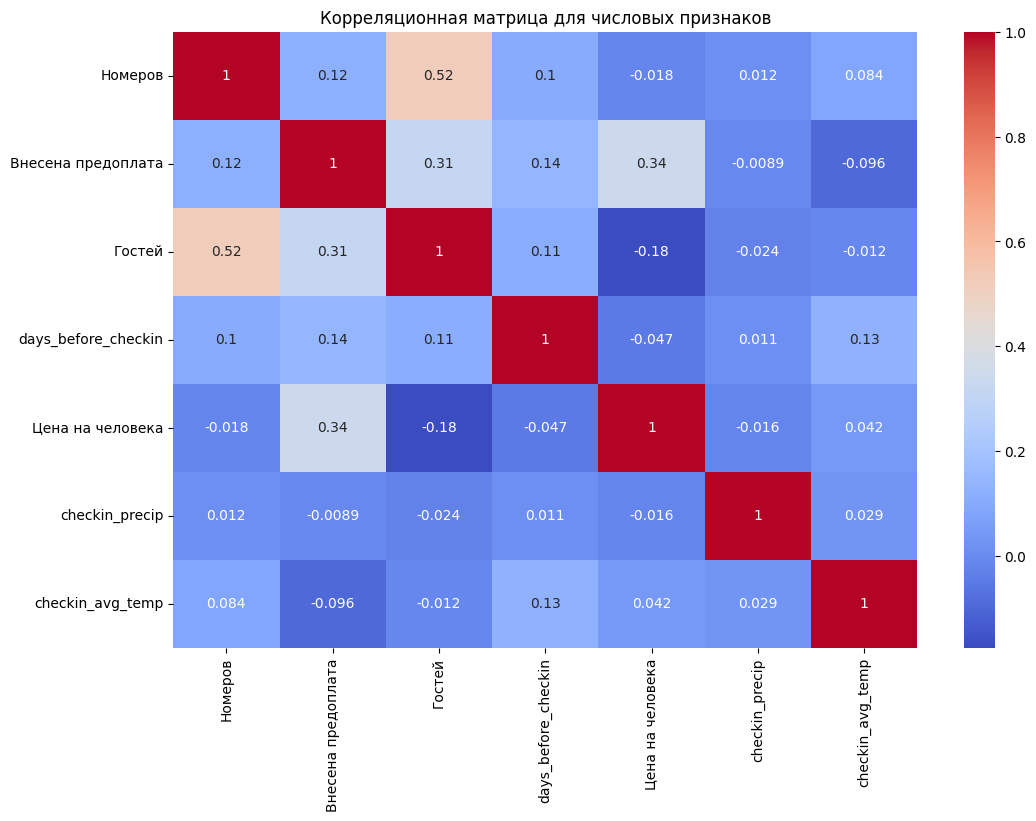

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = train_df_classif[numeric_ord_feat].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для числовых признаков')
plt.show()

In [ ]:
# удаляем количество номеров
# train_df_classif = train_df_classif.drop('Номеров', axis=1)
# test_df_classif = test_df_classif.drop('Номеров', axis=1)

In [ ]:
# удаляем количество номеров студий
train_df_classif = train_df_classif.drop('Номер «Стандарт»', axis=1)
test_df_classif = test_df_classif.drop('Номер «Стандарт»', axis=1)

In [ ]:
numeric_ord_feat.remove('Номер «Стандарт»')

In [ ]:
numeric_ord_feat

['Номеров',
 'Внесена предоплата',
 'Гостей',
 'days_before_checkin',
 'Номер «Студия»',
 'Апартаменты с 2 спальнями с отдельным входом',
 'Коттедж с 2 спальнями',
 'Цена на человека',
 'checkin_precip',
 'checkin_avg_temp']

In [ ]:
train_df_classif

,Номеров,Внесена предоплата,Ночей,Гостей,booking_day,days_before_checkin,Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay),Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay),Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта),Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),...,checkin_avg_temp,checkin_precip,checkin_weekday_0,checkin_weekday_1,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6,Цена на человека
0,1,0,3,2,20,7,0.0,0.0,0.0,0.0,...,10.10,12.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4283.333333
1,1,12400,2,2,18,23,0.0,0.0,0.0,0.0,...,23.20,9.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6200.000000
2,1,12900,2,2,14,19,0.0,0.0,0.0,0.0,...,11.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6450.000000
3,1,0,1,1,8,9,0.0,0.0,0.0,0.0,...,19.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10500.000000
4,1,28690,2,4,20,8,0.0,0.0,0.0,0.0,...,16.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3586.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,9120,2,2,7,61,0.0,0.0,0.0,0.0,...,-6.65,2.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4560.000000
26170,1,23200,3,3,20,4,0.0,0.0,0.0,0.0,...,23.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7733.333333
26171,1,13900,4,2,8,46,0.0,0.0,0.0,0.0,...,21.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6950.000000
26172,1,0,1,2,19,67,0.0,0.0,0.0,0.0,...,15.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3150.000000


#### train-test split, scaling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df_classif,
    canc_labels,
    random_state=68,
    train_size=0.7,
    stratify=canc_labels
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_ord_feat])
X_test_scaled = scaler.transform(X_test[numeric_ord_feat])

X_train[numeric_ord_feat] = X_train_scaled
X_test[numeric_ord_feat] = X_test_scaled

In [ ]:
X_train

,Номеров,Внесена предоплата,Ночей,Гостей,booking_day,days_before_checkin,Способ оплаты_Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay),Способ оплаты_Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay),Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта),Способ оплаты_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),...,checkin_avg_temp,checkin_precip,checkin_weekday_0,checkin_weekday_1,checkin_weekday_2,checkin_weekday_3,checkin_weekday_4,checkin_weekday_5,checkin_weekday_6,Цена на человека
19783,-0.26331,-0.001368,2,-0.500504,1,4.187172,0.0,0.0,0.0,0.0,...,1.505038,-0.175806,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.014779
5643,-0.26331,-0.713948,2,-0.500504,2,-0.896299,0.0,0.0,0.0,0.0,...,-0.124461,-0.536536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.008447
519,-0.26331,0.151328,2,-0.500504,24,-0.033649,0.0,0.0,0.0,0.0,...,0.450102,-0.492545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.646849
19309,-0.26331,-0.208598,2,-0.500504,16,-0.434165,0.0,0.0,0.0,0.0,...,0.803317,-0.536536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.156970
24044,-0.26331,-0.713948,1,-0.500504,28,-0.341738,0.0,0.0,0.0,0.0,...,-0.374066,1.953384,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.322512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,-0.26331,-0.713948,1,2.783194,8,0.459293,0.0,0.0,0.0,0.0,...,-1.009853,0.202521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.424936
12997,-0.26331,-0.713948,1,-0.500504,20,-0.865490,0.0,0.0,0.0,0.0,...,-1.315973,-0.536536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.533202
19536,-0.26331,-0.274039,1,-0.500504,23,-0.865490,0.0,0.0,0.0,0.0,...,0.666741,-0.536536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.113917
25727,8.40792,1.278367,5,4.425043,30,1.691650,0.0,0.0,0.0,0.0,...,0.826865,5.719058,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.126871


#### when the data is ready

In [ ]:
numeric_ord_feat = ['Номеров', 'Внесена предоплата', 'Ночей', 'Гостей',
                    'days_before_checkin', 'booking_avg_temp', 'booking_precip',
                    'checkin_avg_temp', 'checkin_precip' , 'Цена на человека']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_final[numeric_ord_feat])
X_val_scaled = scaler.transform(df_val_final[numeric_ord_feat])

df_train_final[numeric_ord_feat] = X_train_scaled
df_val_final[numeric_ord_feat] = X_val_scaled

#### handling disbalance in the data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
Counter(train_canc_labels)

Counter({0: 14635, 1: 3686})

In [ ]:
14635 * 3

43905

In [ ]:
oversample = SMOTE(sampling_strategy={0: 14635, 1: 43905} ,random_state=22)
X_train_oversampled, y_train_oversampled = oversample.fit_resample(df_train_final, train_canc_labels)

In [ ]:
Counter(y_train_oversampled)

Counter({0: 14635, 1: 43905})

In [ ]:
14635 / 3

4878.333333333333

In [ ]:
oversample = RandomUnderSampler(sampling_strategy={0: 4878, 1: 14635}, random_state=22)
X_train_sampled, y_train_sampled = oversample.fit_resample(X_train_oversampled, y_train_oversampled)

In [ ]:
from collections import Counter
Counter(y_train_sampled)

Counter({0: 4878, 1: 14635})

#### PCA

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
X_train_oversampled.shape

(29270, 47)

In [ ]:
# svd = TruncatedSVD(n_components=89).fit(X_train)
svd = TruncatedSVD(n_components=47).fit(X_train_oversampled)
exp_var = svd.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([0.85710001, 0.87897638, 0.89728812, 0.91130816, 0.92366772,
       0.93547817, 0.94481033, 0.95232754, 0.95937103, 0.96549653,
       0.96915577, 0.97229812, 0.97524046, 0.97777213, 0.98026996,
       0.98231335, 0.9838308 , 0.98532525, 0.98679824, 0.98813149,
       0.98944337, 0.99071406, 0.99189525, 0.99302135, 0.99401494,
       0.99491253, 0.99566682, 0.99633433, 0.9969761 , 0.99752666,
       0.99800624, 0.99844688, 0.99882893, 0.99917907, 0.99943245,
       0.99965675, 0.9998497 , 0.99992657, 0.99995831, 0.99997122,
       0.99998092, 0.99998745, 0.99999381, 0.99999713, 0.99999924,
       0.99999962, 1.        ])

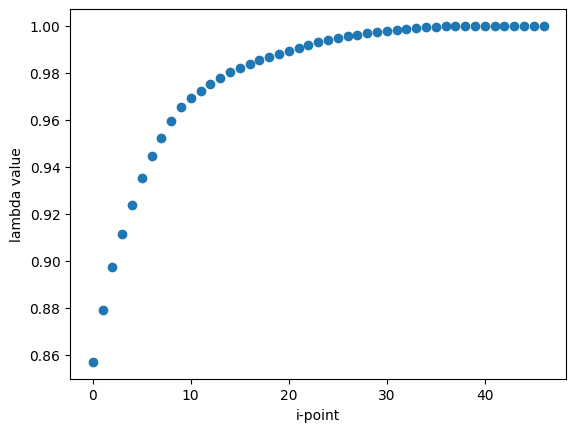

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
nums = list(range(len(exp_var)))
ax.scatter(nums, cum_exp_var);
ax.set_xlabel('i-point');
ax.set_ylabel('lambda value');

In [ ]:
var_mask = cum_exp_var <= 0.95
sing_values = svd.singular_values_[var_mask]
n_components = sing_values.shape[0]
n_components

7

In [ ]:
svd_with_pc = TruncatedSVD(n_components=n_components)
# X_train_reduced = svd_with_pc.fit_transform(X_train)
X_train_reduced = svd_with_pc.fit_transform(X_train_oversampled)
X_test_reduced = svd_with_pc.transform(df_val_final)

#### training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, RocCurveDisplay

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

In [ ]:
# функция для обучения моделей на базовых параметрах
def train_model(model, X_train, X_val, y_train, y_val):

    model.fit(X_train, y_train) # training model on train data
    y_pred = model.predict(X_val) # making a prediction on validation data

    macro_roc_auc = roc_auc_score(y_val, y_pred, average='macro')
    print("Macro ROC-AUC:", macro_roc_auc)

    micro_roc_auc = roc_auc_score(y_val, y_pred, average='micro')
    print("Micro ROC-AUC:", micro_roc_auc)

    samples_roc_auc = roc_auc_score(y_val, y_pred, average='samples')
    print("Averaged_across_samples ROC-AUC:", samples_roc_auc)

    w_roc_auc = roc_auc_score(y_val, y_pred, average='weighted')
    print("Weighted ROC-AUC:", w_roc_auc)

    print("Classification Report:")
    print(classification_report(y_val, y_pred)) # getting all classification metrics

    FPR, TPR, _ = roc_curve(y_val, y_pred)
    RocCurveDisplay(fpr=FPR, tpr=TPR).plot()

    return model, y_pred

In [ ]:
# функция для подбора гиперпараметров на кросс-валидации
# возвращает лучшую модель
def choose_best_model(model, params, X_train, X_test, y_train, y_test) -> object:
    grid_search = GridSearchCV(
        estimator=model, # инициализируем класс подбора гиперпараметров
        param_grid=params,
        scoring='roc_auc_ovr_weighted',
        verbose=2,
        cv=2)
    grid_search.fit(X_train, y_train) # обучаем

    best_model = grid_search.best_estimator_ # получаем объект лучшей модели

    return best_model

##### for ready data

Macro ROC-AUC: 0.7648293439340689
Micro ROC-AUC: 0.7648293439340689
Averaged_across_samples ROC-AUC: 0.7648293439340689
Weighted ROC-AUC: 0.7648293439340689
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6347
           1       0.66      0.60      0.63      1506

    accuracy                           0.86      7853
   macro avg       0.78      0.76      0.77      7853
weighted avg       0.86      0.86      0.86      7853



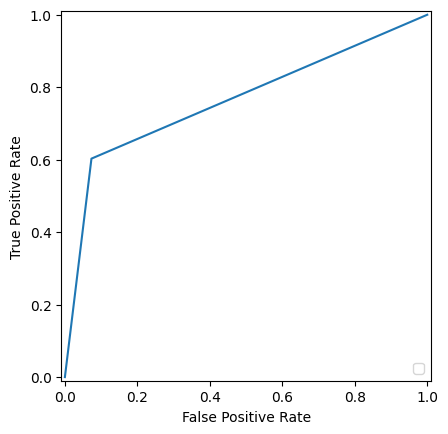

In [ ]:
grad_boost_final, grad_boost_predict = train_model(
    GradientBoostingClassifier(n_estimators=100, random_state=42),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.76379257927588
Micro ROC-AUC: 0.76379257927588
Averaged_across_samples ROC-AUC: 0.76379257927588
Weighted ROC-AUC: 0.76379257927588
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6347
           1       0.91      0.54      0.68      1506

    accuracy                           0.90      7853
   macro avg       0.90      0.76      0.81      7853
weighted avg       0.90      0.90      0.89      7853



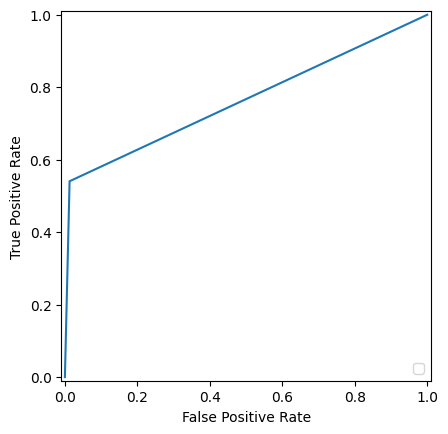

In [ ]:
grad_boost___, grad_boost_predict = train_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
            df_train_final,
            df_val_final,
            train_canc_labels,
            val_canc_labels)

Macro ROC-AUC: 0.7732690894946551
Micro ROC-AUC: 0.7732690894946551
Averaged_across_samples ROC-AUC: 0.7732690894946551
Weighted ROC-AUC: 0.7732690894946551
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6347
           1       0.84      0.57      0.68      1506

    accuracy                           0.90      7853
   macro avg       0.87      0.77      0.81      7853
weighted avg       0.89      0.90      0.89      7853



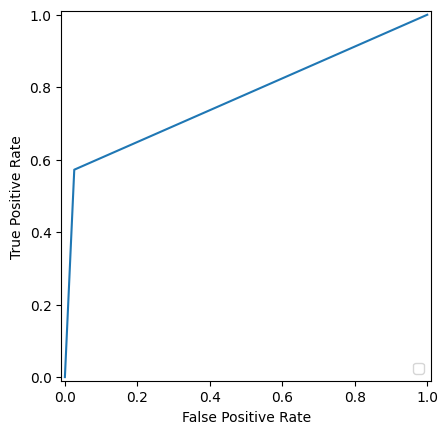

In [ ]:
grad_boost, grad_boost_predict = train_model(
    GradientBoostingClassifier(
        n_estimators=300,
        random_state=42
        ),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.76330678546253
Micro ROC-AUC: 0.76330678546253
Averaged_across_samples ROC-AUC: 0.76330678546253
Weighted ROC-AUC: 0.76330678546253
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6347
           1       0.48      0.71      0.57      1506

    accuracy                           0.80      7853
   macro avg       0.70      0.76      0.72      7853
weighted avg       0.84      0.80      0.81      7853



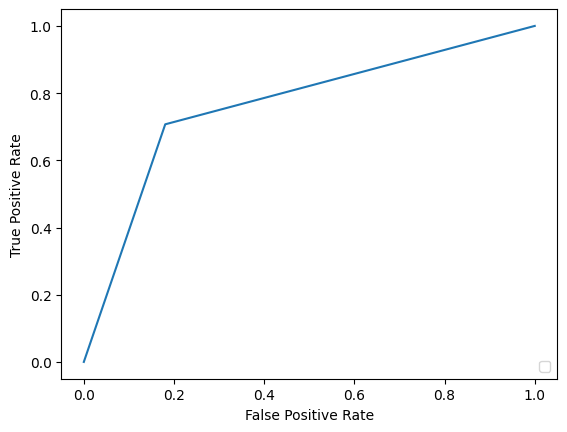

In [ ]:
grad_boost, grad_boost_predict = train_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
            X_train_sampled,
            df_val_final,
            y_train_sampled,
            val_canc_labels)

Macro ROC-AUC: 0.7656553555747075
Micro ROC-AUC: 0.7656553555747075
Averaged_across_samples ROC-AUC: 0.7656553555747075
Weighted ROC-AUC: 0.7656553555747075
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6347
           1       0.86      0.55      0.67      1506

    accuracy                           0.90      7853
   macro avg       0.88      0.77      0.81      7853
weighted avg       0.89      0.90      0.89      7853



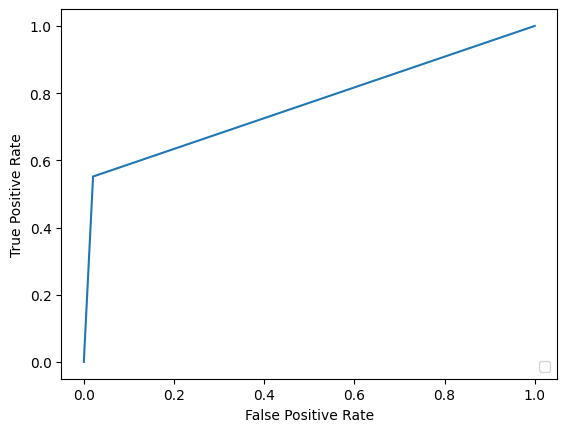

In [ ]:
xg_boost, xg_boost_predict = train_model(XGBClassifier(random_state=42),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.728957339069749
Micro ROC-AUC: 0.728957339069749
Averaged_across_samples ROC-AUC: 0.728957339069749
Weighted ROC-AUC: 0.728957339069749
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6347
           1       0.51      0.60      0.55      1506

    accuracy                           0.81      7853
   macro avg       0.70      0.73      0.71      7853
weighted avg       0.82      0.81      0.82      7853



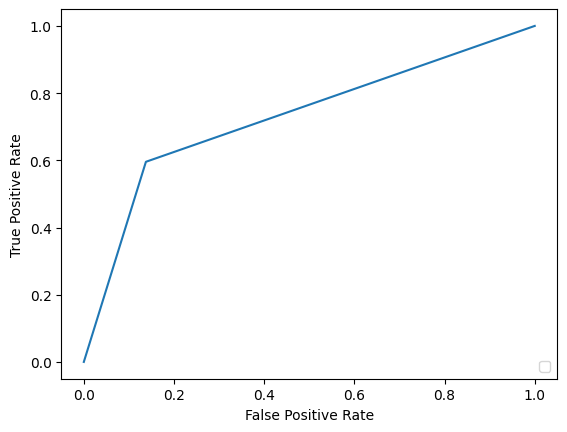

In [ ]:
dec_tree, dec_tree_predict = train_model(DecisionTreeClassifier(random_state=42),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.7682465348939831
Micro ROC-AUC: 0.7682465348939831
Averaged_across_samples ROC-AUC: 0.7682465348939831
Weighted ROC-AUC: 0.7682465348939831
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      6347
           1       0.54      0.68      0.60      1506

    accuracy                           0.83      7853
   macro avg       0.73      0.77      0.74      7853
weighted avg       0.84      0.83      0.83      7853



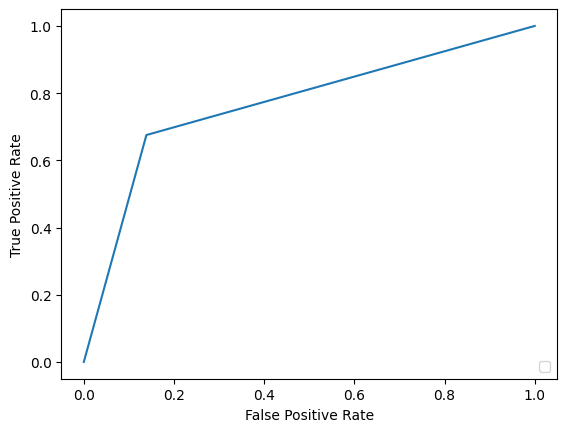

In [ ]:
forest_sam, forest_sam_predict = train_model(RandomForestClassifier(random_state=42),
            X_train_sampled,
            df_val_final,
            y_train_sampled,
            val_canc_labels)

Macro ROC-AUC: 0.7674729368854083
Micro ROC-AUC: 0.7674729368854083
Averaged_across_samples ROC-AUC: 0.7674729368854083
Weighted ROC-AUC: 0.7674729368854083
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6347
           1       0.87      0.56      0.68      1506

    accuracy                           0.90      7853
   macro avg       0.88      0.77      0.81      7853
weighted avg       0.90      0.90      0.89      7853



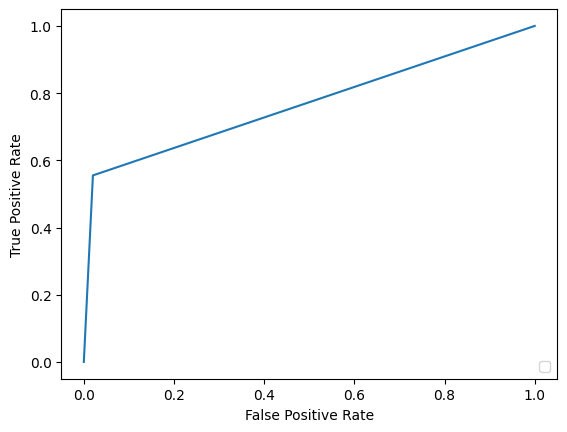

In [ ]:
forest, forest_predict = train_model(RandomForestClassifier(random_state=42),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.7647839397098858
Micro ROC-AUC: 0.7647839397098858
Averaged_across_samples ROC-AUC: 0.7647839397098858
Weighted ROC-AUC: 0.7647839397098858
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6347
           1       0.71      0.59      0.64      1506

    accuracy                           0.88      7853
   macro avg       0.81      0.76      0.78      7853
weighted avg       0.87      0.88      0.87      7853



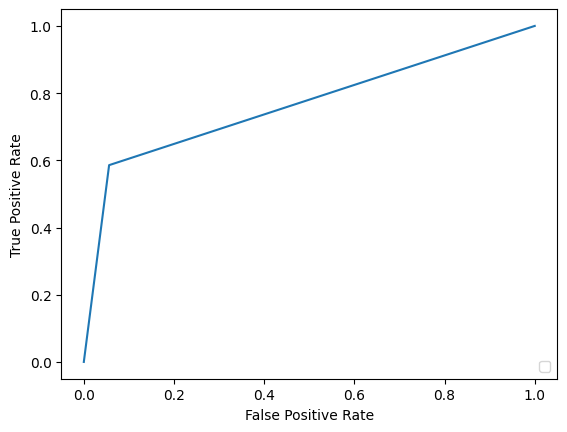

In [ ]:
ada_boost, ada_boost_predict = train_model(AdaBoostClassifier(),
            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

Macro ROC-AUC: 0.7588086190213518
Micro ROC-AUC: 0.7588086190213518
Averaged_across_samples ROC-AUC: 0.7588086190213518
Weighted ROC-AUC: 0.7588086190213518
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6295
           1       0.91      0.53      0.67      1558

    accuracy                           0.90      7853
   macro avg       0.90      0.76      0.80      7853
weighted avg       0.90      0.90      0.89      7853



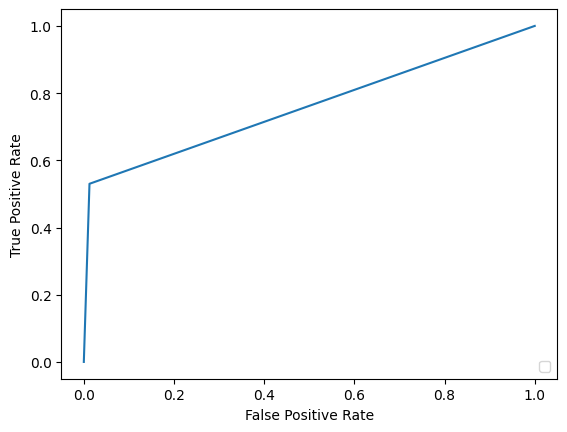

In [ ]:
grad_boost, grad_boost_predict = train_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
            X_train,
            X_test,
            y_train,
            y_test)

In [ ]:
X_train_oversampled.shape

(29374, 89)

Macro ROC-AUC: 0.7631114512098259
Micro ROC-AUC: 0.7631114512098259
Averaged_across_samples ROC-AUC: 0.7631114512098259
Weighted ROC-AUC: 0.7631114512098259
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6295
           1       0.86      0.55      0.67      1558

    accuracy                           0.89      7853
   macro avg       0.88      0.76      0.80      7853
weighted avg       0.89      0.89      0.88      7853



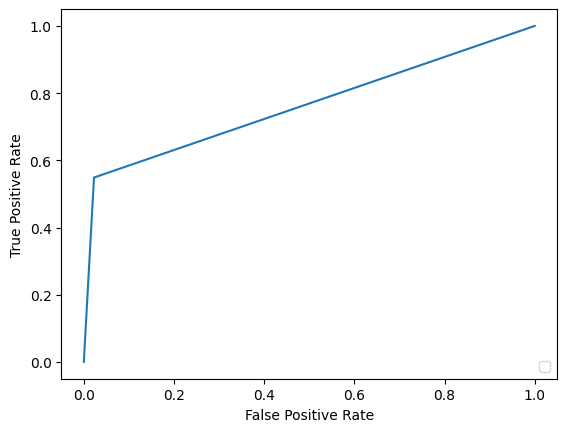

In [ ]:
grad_boost, grad_boost_predict = train_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
            X_train_oversampled,
            X_test,
            y_train_oversampled,
            y_test)

In [ ]:
features_importance = pd.Series(grad_boost.feature_importances_)
features_importance.index = X_train_oversampled.columns
features_importance_df = features_importance.sort_values(ascending=False)
features_importance_df_positive = features_importance_df[features_importance_df > 0]
features_importance_df_positive

,0
Способ оплаты_Отложенная электронная оплата: Банк Россия (банк. карта),4.443013e-01
Внесена предоплата,1.653359e-01
Источник_Официальный сайт,7.934974e-02
days_before_checkin,6.631261e-02
Способ оплаты_Банк. карта: Банк Россия (банк. карта),5.603930e-02
checkin_weekday_5,1.903267e-02
Способ оплаты_Внешняя система оплаты (С предоплатой),1.739079e-02
Способ оплаты_Внешняя система оплаты,1.561751e-02
checkin_weekday_4,1.456561e-02
checkin_weekday_6,1.285146e-02


Macro ROC-AUC: 0.7224558786493346
Micro ROC-AUC: 0.7224558786493346
Averaged_across_samples ROC-AUC: 0.7224558786493346
Weighted ROC-AUC: 0.7224558786493346
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      6295
           1       0.44      0.65      0.53      1558

    accuracy                           0.77      7853
   macro avg       0.67      0.72      0.69      7853
weighted avg       0.81      0.77      0.78      7853



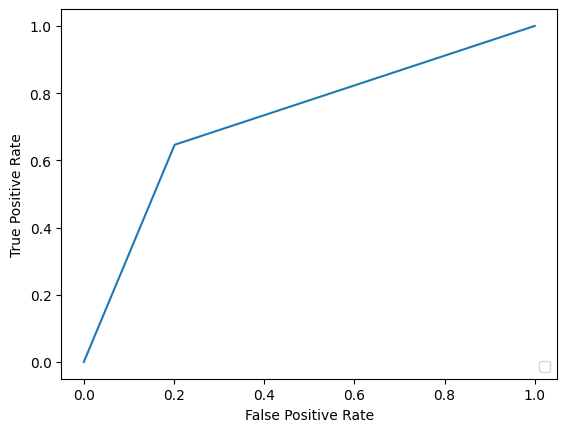

In [ ]:
grad_boost, grad_boost_predict = train_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
            X_train_reduced,
            X_test_reduced,
            y_train_oversampled,
            y_test)

Macro ROC-AUC: 0.7582686811567753
Micro ROC-AUC: 0.7582686811567753
Averaged_across_samples ROC-AUC: 0.7582686811567753
Weighted ROC-AUC: 0.7582686811567753
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6295
           1       0.89      0.53      0.67      1558

    accuracy                           0.89      7853
   macro avg       0.89      0.76      0.80      7853
weighted avg       0.89      0.89      0.88      7853



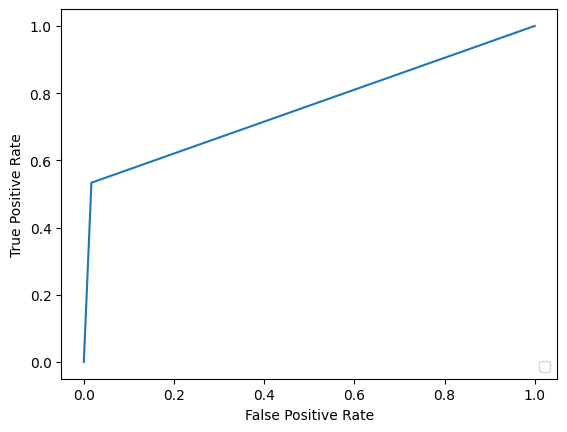

In [ ]:
xg_boost, xg_boost_predict = train_model(XGBClassifier(random_state=42),
            np.array(X_train),
            np.array(X_test),
            y_train,
            y_test)

Macro ROC-AUC: 0.7464791116286231
Micro ROC-AUC: 0.7464791116286231
Averaged_across_samples ROC-AUC: 0.7464791116286231
Weighted ROC-AUC: 0.7464791116286231
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6295
           1       0.57      0.61      0.59      1558

    accuracy                           0.83      7853
   macro avg       0.74      0.75      0.74      7853
weighted avg       0.84      0.83      0.83      7853



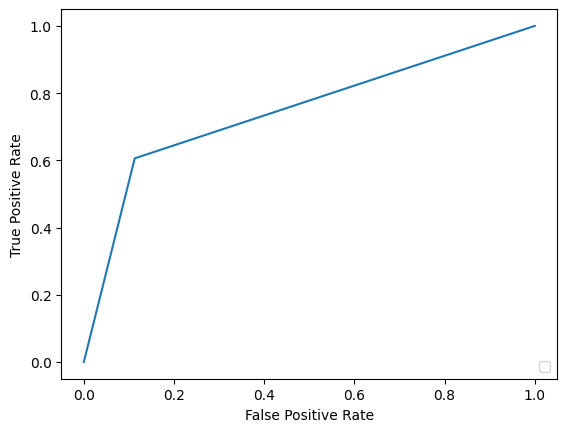

In [ ]:
dec_tree, dec_tree_predict = train_model(DecisionTreeClassifier(random_state=42),
            X_train,
            X_test,
            y_train,
            y_test)

Macro ROC-AUC: 0.7586497627862446
Micro ROC-AUC: 0.7586497627862446
Averaged_across_samples ROC-AUC: 0.7586497627862446
Weighted ROC-AUC: 0.7586497627862446
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6295
           1       0.91      0.53      0.67      1558

    accuracy                           0.90      7853
   macro avg       0.90      0.76      0.80      7853
weighted avg       0.90      0.90      0.89      7853



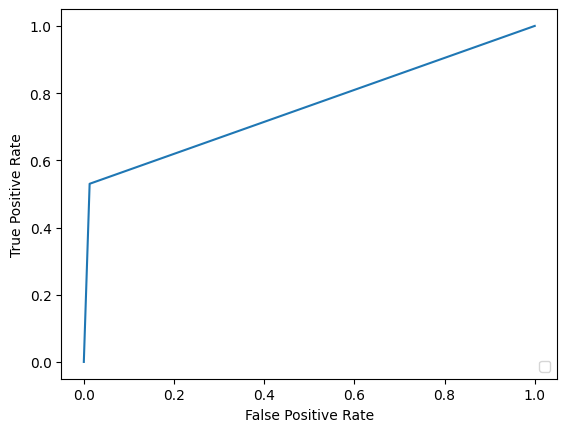

In [ ]:
forest, forest_predict = train_model(RandomForestClassifier(random_state=42),
            X_train,
            X_test,
            y_train,
            y_test)

Macro ROC-AUC: 0.7613952838663037
Micro ROC-AUC: 0.7613952838663037
Averaged_across_samples ROC-AUC: 0.7613952838663037
Weighted ROC-AUC: 0.7613952838663037
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6295
           1       0.89      0.54      0.67      1558

    accuracy                           0.90      7853
   macro avg       0.89      0.76      0.80      7853
weighted avg       0.90      0.90      0.89      7853



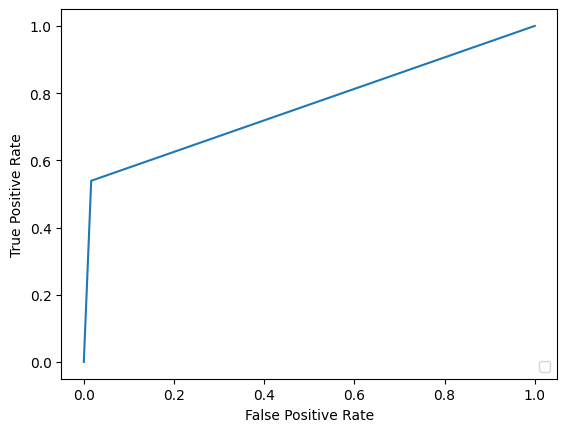

In [ ]:
ada_boost, ada_boost_predict = train_model(AdaBoostClassifier(),
            X_train,
            X_test,
            y_train,
            y_test)

In [ ]:
# parameters = {
#     'max_depth': [80, 90, 100, 110],
#     'min_samples_leaf': [3, 4, 5],
#     'n_estimators': [100, 200, 300, 1000]
# }

parameters = {
    'max_depth': [80, 110],
    'min_samples_leaf': [3, 5],
    'n_estimators': [100, 300]
}

best_grad_boost = choose_best_model(GradientBoostingClassifier(random_state=42),
                            parameters,
                            X_train,
                            X_test,
                            y_train,
                            y_test)
best_grad_boost

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .max_depth=80, min_samples_leaf=3, n_estimators=100; total time=  26.4s
[CV] END .max_depth=80, min_samples_leaf=3, n_estimators=100; total time=  24.4s
[CV] END .max_depth=80, min_samples_leaf=3, n_estimators=300; total time= 1.2min
[CV] END .max_depth=80, min_samples_leaf=3, n_estimators=300; total time= 1.4min
[CV] END .max_depth=80, min_samples_leaf=5, n_estimators=100; total time=  23.0s
[CV] END .max_depth=80, min_samples_leaf=5, n_estimators=100; total time=  22.8s
[CV] END .max_depth=80, min_samples_leaf=5, n_estimators=300; total time= 1.5min
[CV] END .max_depth=80, min_samples_leaf=5, n_estimators=300; total time= 1.5min
[CV] END max_depth=110, min_samples_leaf=3, n_estimators=100; total time=  23.8s
[CV] END max_depth=110, min_samples_leaf=3, n_estimators=100; total time=  24.2s
[CV] END max_depth=110, min_samples_leaf=3, n_estimators=300; total time= 1.3min
[CV] END max_depth=110, min_samples_leaf=3, n_est

GradientBoostingClassifier(max_depth=80, min_samples_leaf=5, random_state=42)

In [ ]:
parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

best_forest = choose_best_model(RandomForestClassifier(max_depth=80, min_samples_leaf=5, random_state=42),
                            parameters,
                            X_train_oversampled,
            df_val_final,
            y_train_oversampled,
            val_canc_labels)

best_forest

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   9.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   5.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=  15.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=  14.4s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200; total time=   5.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200; total time=   4.4

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=500,
                       random_state=42)

Macro ROC-AUC: 0.5
Micro ROC-AUC: 0.5
Averaged_across_samples ROC-AUC: 0.5
Weighted ROC-AUC: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6295
           1       0.00      0.00      0.00      1558

    accuracy                           0.80      7853
   macro avg       0.40      0.50      0.44      7853
weighted avg       0.64      0.80      0.71      7853



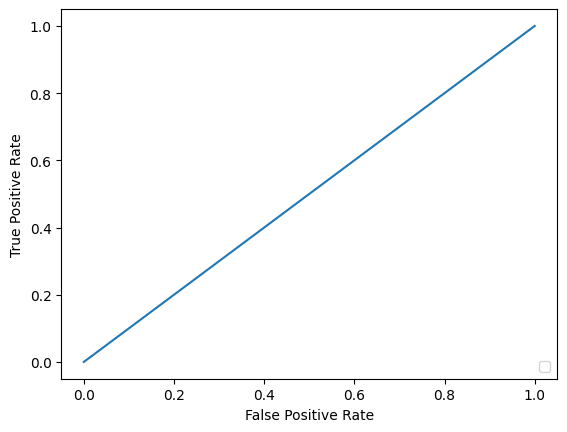

In [ ]:
forest, _ = train_model(best_forest,
            X_train_scaled,
            X_test_scaled,
            y_train,
            y_test)

### inference

In [ ]:
df_test_final = pd.read_csv('df_test_final.csv')

In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Номеров                                   18321 non-null  float64
 1   Внесена предоплата                        18321 non-null  float64
 2   Ночей                                     18321 non-null  float64
 3   Гостей                                    18321 non-null  float64
 4   booking_day                               18321 non-null  int64  
 5   days_before_checkin                       18321 non-null  float64
 6   holiday_during_stay                       18321 non-null  int64  
 7   booking_avg_temp                          18321 non-null  float64
 8   booking_precip                            18321 non-null  float64
 9   checkin_avg_temp                          18321 non-null  float64
 10  checkin_precip                    

In [ ]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 79 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Номеров                                   11218 non-null  int64  
 1   Внесена предоплата                        11218 non-null  int64  
 2   Ночей                                     11218 non-null  int64  
 3   Гостей                                    11218 non-null  int64  
 4   booking_day                               11218 non-null  int64  
 5   days_before_checkin                       11218 non-null  int64  
 6   holiday_during_stay                       11218 non-null  int64  
 7   booking_avg_temp                          11218 non-null  float64
 8   booking_precip                            11218 non-null  float64
 9   checkin_avg_temp                          11218 non-null  float64
 10  checkin_precip                    

In [ ]:
df_test_final = df_test_final.drop('Цена', axis=1)

In [ ]:
X_test_final_scaler = scaler.transform(df_test_final[numeric_ord_feat])
df_test_final[numeric_ord_feat] = X_test_final_scaler

In [ ]:
final_prediction = grad_boost.predict(df_test_final)
final_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Counter(final_prediction)

Counter({0: 9280, 1: 1938})

In [ ]:
final_prediction.shape

(11218,)

In [ ]:
pd.Series(final_prediction).to_csv('classif_result.csv', index=False, header=False)